##### Aby uruchomić poniższy kod, należy użyć pip:
###### pipenv install - aby zainstalować wszystkie potrzebne biblioteki i zależności
###### pipenv shell - aby wybrać to środowisko wirtualne
###### pipenv --rm - aby usunąć środowisko wirtualne/kernel po zakończeniu instalacji

##### Importowanie wszystkich niezbędnych bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### Otwarcie pliku Excel i wykonanie kopii, aby zachować oryginał w razie jakichkolwiek problemów

In [2]:
główny_df = pd.read_csv("./Zrodlo.csv")
kopia_df = główny_df.copy()

##### Sprawdzanie szczegółów df

In [3]:
kopia_df.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,370.500000,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,214.341239,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,185.250000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,370.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,555.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,741.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [4]:
kopia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

In [5]:
kopia_df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

#### Czyszczenie danych

###### Podstawowe czyszczenie

In [6]:
##Najpierw usuwam zbędne kolumny

kopia_df.drop(["Unnamed: 0", "Job Description", "Type of ownership", "Competitors", 
"employer_provided", "company_txt", "same_state", "age", "python_yn", "R_yn", 
"spark", "aws", "excel", "job_simp", "seniority", "desc_len", "num_comp"], axis=1, inplace=True)

kopia_df.columns

Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Industry', 'Sector', 'Revenue',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'job_state'],
      dtype='object')

In [7]:
##Sprawdzenie czy w kolumnach są wartości na

kopia_df[kopia_df.isna().any(axis=1)]

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Industry,Sector,Revenue,hourly,min_salary,max_salary,avg_salary,job_state


In [8]:
##Następnie upewniam się, że wyczyściłem wszystkie puste przestrzenie dla wszystkich wartości słownych, aby uniknąć błędów

kopia_df = kopia_df.applymap(lambda x: x.strip() if type(x) == str else x)

In [9]:
kopia_df.sample(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Industry,Sector,Revenue,hourly,min_salary,max_salary,avg_salary,job_state
390,Managing Data Scientist/ML Engineer,$81K-$134K (Glassdoor est.),3.4,PA Consulting\n3.4,"Boston, MA","London, United Kingdom",1001 to 5000 employees,1943,Consulting,Business Services,$100 to $500 million (USD),0,81,134,107.5,MA
13,Data Analyst,$46K-$85K (Glassdoor est.),4.1,Yesler\n4.1,"Seattle, WA","Seattle, WA",201 to 500 employees,2012,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,46,85,65.5,WA


###### Czyszczenie df na podstawie kolumny "Hourly"

In [10]:
##Najpierw sprawdzamy, jakie wartości znajdują się w kolumnie "hourly", 
##a następnie wybieramy tylko te, które pokazują wynagrodzenie jako średnie w skali roku

print(kopia_df['hourly'].unique())

kopia_df = kopia_df[~(kopia_df["hourly"] == 1)]

[0 1]


##### Czyszczenie i transformowanie wartości w ważnych kolumnach
###### Czyszczenie kolumny "Location"

In [11]:
##Sprawdzenie ile unikalnych wartości znajduje się w kolumnie "Location"
print(kopia_df["Location"].unique().shape)

##Ponieważ jest zbyt wiele unikalnych wartości, aby sprawdzić je ręcznie, 
##sprawdzamy czy nie ma dziwnych wartości w kolumnie "Location" używając poniższej metody
print(kopia_df["Location"].isin(["N/A", "Not-Applicable", "Not/Applicable", "n/a", "na", "Unknown",
                        "Unknown / Not-Applicable", "Unknown / Non-Applicable", "Unknown/Not-Applicable", 
                        "Unknown/Non-Applicable"]).value_counts())


##Teraz upewniam się, że wszystkie wartości są alfabetyczne
kopia_df["Location"].str.replace("\W", "", regex=True).str.isalpha().value_counts()


(194,)
False    718
Name: Location, dtype: int64


True    718
Name: Location, dtype: int64

###### Zmiana kolumny "Location" tak, aby była podzielona na miasto i stan

In [12]:
##Podzielenie kolumny "Location" za pomocą "," i przypisanie jej do nowej zmiennej, po to, aby ułatwić kontrolę
miasto_stan = kopia_df["Location"].str.split(",", expand=True)
miasto_stan.head(3)

,0,1,2
0,Albuquerque,NM,None
1,Linthicum,MD,None
2,Clearwater,FL,None


In [13]:
##Po pierwsze, zmieniam nazwy kolumn
miasto_stan.rename(columns={0: "Lokacja-Miasto", 1: "Lokacja-Stan", 2: "Lokacja-Nieznane"}, inplace=True)

##Teraz sprawdzam, które kolumny maja wartości NA, co później pozwoli nam na znalezienie wierszy z wartościami NA
##Prawidłowa liczba wierszy powinna wynosić 718, więc jeśli liczba wyniesie poniżej 718
##oznacza to, że w tej kolumnie znajdują się wartości NA.
miasto_stan[pd.isna(miasto_stan["Lokacja-Miasto"])].index.value_counts().sum()
miasto_stan[pd.isna(miasto_stan["Lokacja-Stan"])].index.value_counts().sum()
miasto_stan[pd.isna(miasto_stan["Lokacja-Nieznane"])].index.value_counts().sum()

##Ponieważ poprzedni kod zwrócił 717 dla kolumny "Lokacja-Nieznane", sprawdzam
##które wiersze wpłynęły na wynik w kolumnie "Lokacja-Nieznane"
indeks_niena = miasto_stan[~pd.isna(miasto_stan["Lokacja-Nieznane"])].index
wiersze_z_niepop_wart = miasto_stan.loc[indeks_niena]
print(wiersze_z_niepop_wart)

##Powyższy kod zwrócił tylko jeden wiersz, który miał wpływ na wynik. W tej sytuacji, zwykła zmiana kolejności
##wartości, powinna naprawić problem
miasto_stan.loc[[126]] = wiersze_z_niepop_wart[["Lokacja-Stan", "Lokacja-Nieznane", "Lokacja-Miasto"]]
print(miasto_stan.loc[[126]])

##Po zmianie kolejności nieprawidłowego wiersza, usuwam zbędną kolumnę, która została utworzona tylko
##z powodu tego 1 wiersza. Sprawdzam czy poprzedni wiersz pokazuje się teraz poprawnie.
miasto_stan.drop("Lokacja-Nieznane", inplace=True, axis=1)
miasto_stan.loc[[126]]

       Lokacja-Miasto  Lokacja-Stan Lokacja-Nieznane
126  Santa Fe Springs   Los Angeles               CA
    Lokacja-Miasto Lokacja-Stan  Lokacja-Nieznane
126    Los Angeles           CA  Santa Fe Springs


,Lokacja-Miasto,Lokacja-Stan
126,Los Angeles,CA


###### Sprawdzanie wartości z kolumny "Lokacja-Stan" poprzez porównanie ich do wartości z kolumny "job_state", która była już obecna w danych

In [14]:
##Porównanie wartości z obu kolumn 
print((miasto_stan["Lokacja-Stan"] == kopia_df["job_state"]).all(axis=0))

##Ponieważ wyszedł błąd, sprawdzenie pierwszych rzędów
miasto_stan["Lokacja-Stan"][0]
kopia_df["job_state"][0]

#Wydaje się, że w kolumnie "Lokacja-Stan" jest dodatkowa spacja po lewej stronie wartości.
##Więc usuwajam ją z Państw, a prewencyjnie, również z kolumny Miasto.
miasto_stan["Lokacja-Miasto"] = miasto_stan["Lokacja-Miasto"].str.lstrip()
miasto_stan["Lokacja-Stan"] = miasto_stan["Lokacja-Stan"].str.lstrip()

##Ponowne porównanie
(miasto_stan["Lokacja-Stan"] == kopia_df["job_state"]).all(axis=0)

False


True

###### Dodanie kolumn do oryginalnego df

In [15]:
##Dodaję obie kolumny do oryginalnego df poprzez mapowanie ich za pomocą indeksu, ponieważ indeks nie został jeszcze zmodyfikowany,
##powinno to działać poprawnie
kopia_df["Lokacja-Miasto"] = kopia_df.index.map(
    miasto_stan["Lokacja-Miasto"])

kopia_df["Lokacja-Stan"] = kopia_df.index.map(
    miasto_stan["Lokacja-Stan"])

##Sprawdzam, czy mapowanie faktycznie zadziałało poprawnie
(kopia_df["Lokacja-Stan"] == kopia_df["job_state"]).all()

True

###### Czyszczenie kolumny "Sektor"

In [16]:
##Sprawdzenie ile unikalnych wartości znajduje się w kolumnie "Sector"
print(kopia_df["Sector"].unique().shape)

##Ponieważ nie ma tak wielu unikalnych wartości, jesteśmy w stanie sprawdzić to ręcznie
print(kopia_df["Sector"].unique())

##Wydaje się, że istnieje nieprawidłowa wartość "-1", w tej sytuacji usuwam wiersze z nieprawidłowymi wartościami.
##Ponieważ typ danych tej kolumny to "Object", "-1" jest traktowane jako ciąg znaków a nie cyfr.
kopia_df = kopia_df[kopia_df["Sector"] != "-1"]

##Wykonanie kodu dla wartości alfabetycznych, aby upewnić się, że nie ma wartości -1
print((kopia_df["Sector"].str.replace("\W", "", regex=True).str.isalpha()).all())

(24,)
['Aerospace & Defense' 'Health Care' 'Business Services'
 'Oil, Gas, Energy & Utilities' 'Real Estate' 'Finance'
 'Information Technology' 'Retail' 'Biotech & Pharmaceuticals' 'Media'
 'Insurance' 'Transportation & Logistics' 'Telecommunications' '-1'
 'Manufacturing' 'Mining & Metals' 'Government' 'Education'
 'Agriculture & Forestry' 'Travel & Tourism' 'Non-Profit'
 'Arts, Entertainment & Recreation' 'Accounting & Legal'
 'Consumer Services']
True


In [17]:
##Upewnienie się, że wszystko jest wyświetlane poprawnie
kopia_df.sample(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Industry,Sector,Revenue,hourly,min_salary,max_salary,avg_salary,job_state,Lokacja-Miasto,Lokacja-Stan
65,Data Scientist,$88K-$148K (Glassdoor est.),2.8,Berg Health\n2.8,"Framingham, MA","Framingham, MA",51 to 200 employees,2006,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$1 to $5 million (USD),0,88,148,118.0,MA,Framingham,MA
457,Staff BI and Data Engineer,$80K-$148K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"San Jose, CA","New York, NY",51 to 200 employees,1998,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,80,148,114.0,CA,San Jose,CA


###### Czyszczenie i kontrola kolumn wynagrodzeń poprzez porównanie już istniejących kolumn wynagrodzeń z liczbami pobranymi z kolumny "Salary Estimate".

###### Minimalne wynagrodzenie

In [18]:
##Dodanie kolumny Minimalne wynagrodzenie roczne, poprzez wyciągnięcie wartości z minimalnych widełek podanych w kolumnie
##"Salary Estimate".
kopia_df["Minimalne Wyn. Roczne"] = kopia_df["Salary Estimate"].map(lambda x: x[x.find("$")+1:x.find("K")])

In [19]:
##Zmienienie typu nowej kolumny na numeryczny, a następnie sprawdzenie czy wartości z nowej kolumny
##pasują do wartości ze starej kolumny

kopia_df["Minimalne Wyn. Roczne"] = pd.to_numeric(kopia_df["Minimalne Wyn. Roczne"])
(kopia_df["Minimalne Wyn. Roczne"] == kopia_df["min_salary"]).all()

True

###### Maksymalne wynagrodzenie

In [20]:
##Powtarzanie tego samego procesu, co powyżej, ale dla maksymalnego wynagrodzenia
kopia_df["Maksymalne Wyn. Roczne"] = kopia_df["Salary Estimate"].map(
    lambda x: x[x.find("$", x.find("-"))+1:x.find("K", x.find("-"))])

In [21]:
##Taki sam proces sprawdzania jak dla wartości minimalnych
kopia_df["Maksymalne Wyn. Roczne"] = pd.to_numeric(kopia_df["Maksymalne Wyn. Roczne"])
(kopia_df["Maksymalne Wyn. Roczne"] == kopia_df["max_salary"]).all()

True

###### Średnie wynagrodzenie

In [22]:
##Dodanie kolumny Średnia pensja poprzez obliczenie średniej wartości dla minimalnej i maksymalnej pensji
kopia_df["Średnie Wyn. Roczne"] = (
    kopia_df["Minimalne Wyn. Roczne"]+kopia_df["Maksymalne Wyn. Roczne"])/2

In [23]:
##Taki sam proces kontroli jak dla wartości minimalnych i maksymalnych
kopia_df["Średnie Wyn. Roczne"] = pd.to_numeric(kopia_df["Średnie Wyn. Roczne"])
(kopia_df["Średnie Wyn. Roczne"] == kopia_df["avg_salary"]).all()

True

###### Upewnienie się, że wynagrodzenia są podane w tysiącach

In [24]:
kopia_df[["Minimalne Wyn. Roczne", "Maksymalne Wyn. Roczne", "Średnie Wyn. Roczne"]] = (
    kopia_df[["Minimalne Wyn. Roczne", "Maksymalne Wyn. Roczne", "Średnie Wyn. Roczne"]]*1000)

In [25]:
kopia_df.sample(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Industry,Sector,...,hourly,min_salary,max_salary,avg_salary,job_state,Lokacja-Miasto,Lokacja-Stan,Minimalne Wyn. Roczne,Maksymalne Wyn. Roczne,Średnie Wyn. Roczne
194,"Principal Scientist, Hematology",$54K-$115K (Glassdoor est.),3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Health Care Services & Hospitals,Health Care,...,0,54,115,84.5,NY,Rochester,NY,54000,115000,84500.0
250,Senior Data Scientist,$116K-$185K (Glassdoor est.),4.0,Autodesk\n4.0,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,1982,Computer Hardware & Software,Information Technology,...,0,116,185,150.5,CA,San Francisco,CA,116000,185000,150500.0


##### Naprawianie Nazw Firm

In [26]:
#Ponieważ są pewne problemy z kolumną "Company Name"
#Próbuję oddzielić wiersze, w których nazwa firmy zawiera i nie zawiera "\n"
z_n = kopia_df["Company Name"][kopia_df["Company Name"].str.contains(r'\n')]
bez_n = kopia_df["Company Name"][~kopia_df["Company Name"].str.contains(r'\n')]

In [27]:
##Tutaj próbuję znaleźć, ile znaków należy usunąć w każdej komórce, z wierszy, które zawierają \n.
znaki = (z_n.str.len() - z_n.str.find("\n"))

##Wykonując .unique() jestem w stanie zobaczyć, czy wszystkie nazwy mają "\n" na końcu zdania
##czy też, w różnych miejscach w całej kolumnie.
##Dodatkowo pokazuje mi to również, ile znaków muszę usunąć z nazw.
znaki.unique()

array([4], dtype=int64)

In [28]:
##Na szczęście wszystkie wartości są równe 4, co oznacza, że dla wszystkich wierszy znak jest w tym samym miejscu, i 
##to właśnie tyle znaków musimy usunąć.

usunięte_n = kopia_df["Company Name"][kopia_df["Company Name"].str.contains(r'\n')].str[:-4]

##Kiedy już usunęliśmy "\n" i wszystkie niepotrzebne znaki na prawo od niego, możemy po prostu
##mapować nowe wartości do istniejącej kolumny za pomocą indeksu.

kopia_df["Company Name"] = kopia_df["Company Name"].index.map(usunięte_n)

##########Proszę zwrócić uwagę###########
##To mogło i powinno być zrobione przy użyciu .replace(), jednak po wypróbowaniu tego, ta metoda
##nie działa zgodnie z oczekiwaniami, stąd powyższe podejście

In [29]:
#Na koniec sprawdzenie czy zmiany zostały zastosowane poprawnie
kopia_df["Company Name"].str.contains(r'\n').value_counts()

False    706
Name: Company Name, dtype: int64

##### Końcowe Czyszczenie

In [30]:
##Usuwanie reszty przestarzałych kolumn. Dodałem je do nowej zmiennej, aby mieć do czego wracać
##w wypadku jakichkolwiek problemów
kopia_df.columns
prawie_gotowy_df = kopia_df.drop(["Rating", "Location", "Headquarters", "Size", "Founded",
"hourly", "min_salary", "max_salary", "avg_salary", "job_state"], axis=1)
prawie_gotowy_df.columns

Index(['Job Title', 'Salary Estimate', 'Company Name', 'Industry', 'Sector',
       'Revenue', 'Lokacja-Miasto', 'Lokacja-Stan', 'Minimalne Wyn. Roczne',
       'Maksymalne Wyn. Roczne', 'Średnie Wyn. Roczne'],
      dtype='object')

In [31]:
##Przetłumaczenie nazw kolumn na polski
prawie_gotowy_df = prawie_gotowy_df.rename(columns={"Job Title":"Stanowisko", "Salary Estimate":"Szacunkowe Wynagrodzenie", 
"Company Name":"Nazwa Firmy","Industry":"Branża", "Sector":"Sektor", "Revenue":"Przychód"})

In [32]:
##Zmiana kolejności kolumn
prawie_gotowy_df = prawie_gotowy_df[["Stanowisko", "Szacunkowe Wynagrodzenie", "Nazwa Firmy","Lokacja-Miasto", "Lokacja-Stan",
 "Minimalne Wyn. Roczne", "Maksymalne Wyn. Roczne", "Średnie Wyn. Roczne", "Branża", "Sektor", "Przychód"]]

In [33]:
##Sprawdzenie jak wyglądają oczyszczone dane
prawie_gotowy_df.sample(3)

,Stanowisko,Szacunkowe Wynagrodzenie,Nazwa Firmy,Lokacja-Miasto,Lokacja-Stan,Minimalne Wyn. Roczne,Maksymalne Wyn. Roczne,Średnie Wyn. Roczne,Branża,Sektor,Przychód
414,Systems Engineer II - Data Analyst,$49K-$76K (Glassdoor est.),Raytheon,Huntsville,AL,49000,76000,62500.0,Aerospace & Defense,Aerospace & Defense,$10+ billion (USD)
548,Data Scientist,$60K-$99K (Glassdoor est.),Oversight Systems,Atlanta,GA,60000,99000,79500.0,Computer Hardware & Software,Information Technology,$25 to $50 million (USD)
8,Research Scientist,$38K-$84K (Glassdoor est.),Rochester Regional Health,Rochester,NY,38000,84000,61000.0,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD)


In [34]:
##Przypisanie teraz całkowicie oczyszczonego df do nowej zmiennej. Dodatkowo resetując indeks
gotowy_df = prawie_gotowy_df.reset_index(drop=True)

In [35]:
##Zapisanie df jako pliku CSV na wypadek, gdyby ten plik uległ uszkodzeniu lub do wykorzystania w przyszłej analizie
gotowy_df.to_csv("./gotowy_df.csv")

### Analiza

###### Tabela przedstawiająca 3 najlepsze sektory w oparciu o Średnie Wyn. Roczne

In [36]:
sektory_średnia = gotowy_df.groupby("Sektor")[["Średnie Wyn. Roczne", "Sektor"]].agg(
    Średnie_Roczne_Wyn = pd.NamedAgg(column="Średnie Wyn. Roczne", aggfunc="mean"),
    Ilość_ofert = pd.NamedAgg(column="Sektor", aggfunc="count"),
    ).round(2).sort_values("Średnie_Roczne_Wyn", ascending=False)


sektory_średnia.head(3)

,Średnie_Roczne_Wyn,Ilość_ofert
Sektor,,
Media,116666.67,6
Accounting & Legal,113500.00,1
Information Technology,113191.67,180


###### Table showing Top 3 sektory based on Średnie Wyn. Roczne, but only those with at least 10 job offers

In [37]:
##Przypisuję top 3 do nowej zmiennej, dla przyszłych obliczeń
więcej_niż_10 = sektory_średnia[sektory_średnia["Ilość_ofert"] >= 10]

Top_3_10 = więcej_niż_10.head(3)
Top_3_10

,Średnie_Roczne_Wyn,Ilość_ofert
Sektor,,
Information Technology,113191.67,180
Biotech & Pharmaceuticals,112441.44,111
Insurance,105942.03,69


###### Tabela pokazująca o ile więcej można zarobić w Top 3 sektorach z co najmniej 10 ofertami pracy, w porównaniu do średniej dla wszystkich sektorów z co najmniej 10 ofertami pracy (w %)

In [38]:
##Obliczanie średniej ważonej, gdzie wagą jest liczba ofert pracy
śr_waż = np.average(więcej_niż_10["Średnie_Roczne_Wyn"], weights=więcej_niż_10["Ilość_ofert"]).round(2)
print(śr_waż)

##Obliczanie wzrostu w %
wzrost_proc = (((Top_3_10[["Średnie_Roczne_Wyn"]]/śr_waż)-1)*100).round(2)
wzrost_proc

104151.54


,Średnie_Roczne_Wyn
Sektor,
Information Technology,8.68
Biotech & Pharmaceuticals,7.96
Insurance,1.72


In [39]:
##Sprawdzanie, czy zwrócone % są poprawne. Jeśli wartości zwrócone przez te obliczenia są równe
##średniej pensji dla Top 3 sektorów, to są one poprawne

##Używam wartości % przed zaokrągleniem, aby upewnić się, że wyniki są najbardziej precyzyjne
print((śr_waż+śr_waż*0.08679785).round(2) == Top_3_10.loc["Information Technology"]["Średnie_Roczne_Wyn"])
print((śr_waż+śr_waż*0.07959460).round(2) == Top_3_10.loc["Biotech & Pharmaceuticals"]["Średnie_Roczne_Wyn"])
print((śr_waż+śr_waż*0.01719120).round(2) == Top_3_10.loc["Insurance"]["Średnie_Roczne_Wyn"])

True
True
True


###### Znalezienie dla każdego z sektorów Top 3 stanów z największą liczbą ofert pracy i średnim wynagrodzeniem rocznym wyższym niż średnie wynagrodzenie dla całego sektora

In [40]:
##Wyodrębnienie wszystkich wierszy dla top3 sektorów
IT_wsz_wiersze = gotowy_df[gotowy_df["Sektor"] == "Information Technology"]
BP_wsz_wiersze = gotowy_df[gotowy_df["Sektor"] == "Biotech & Pharmaceuticals"]
Ubez_wsz_wiersze = gotowy_df[gotowy_df["Sektor"] == "Insurance"]

##Sprawdzenie, czy dane są poprawne
print(IT_wsz_wiersze.shape)
print(BP_wsz_wiersze.shape)
print(Ubez_wsz_wiersze.shape)

(180, 11)
(111, 11)
(69, 11)


In [41]:
##Ponieważ musiałbym zastosować funkcję Group By do każdego sektora osobno, postanowiłem stworzyć funkcję
##aby ułatwić i przyspieszyć obliczenia
def Top3Stany(Sektor_wiersze, Śr_wyn_na_sektor):
    """
    Sektor_wiersze - dotyczy df z wierszami tylko dla konkretnego sektora (np. IT_wsz_wiersze)
    Śr_wyn_na_sektor - średnie wynagrodzenie roczne dla sektora, który chcemy sprawdzić
    """
    tymczasowe = Sektor_wiersze.groupby("Lokacja-Stan").agg(
    Średnie_Roczne_Wyn = pd.NamedAgg(column="Średnie Wyn. Roczne", aggfunc="mean"),
    Ilość_ofert = pd.NamedAgg(column="Lokacja-Stan", aggfunc="count")
    ).round(2).sort_values(["Ilość_ofert", "Średnie_Roczne_Wyn"], ascending=False)
    
    wynik = tymczasowe[tymczasowe["Średnie_Roczne_Wyn"] >= Śr_wyn_na_sektor].head(3)
    return wynik

In [42]:
##Wykorzystanie funkcji - Top 3 stany dla informatyki
Top3_stany_IT = Top3Stany(IT_wsz_wiersze, 113191.67)
Top3_stany_IT

,Średnie_Roczne_Wyn,Ilość_ofert
Lokacja-Stan,,
CA,138536.76,68
NY,114541.67,12
WA,131500.00,6


In [43]:
##Wykorzystanie funkcji - Top 3 stany dla Biotech & Pharmaceuticals
Top3_stany_BP = Top3Stany(BP_wsz_wiersze, 112441.44)
Top3_stany_BP

,Średnie_Roczne_Wyn,Ilość_ofert
Lokacja-Stan,,
MA,117843.75,48
CA,118477.27,22
NY,119500.00,8


In [44]:
##Wykorzystanie funkcji - Top 3 stany dla Insurance
Top3_stany_Ubez = Top3Stany(Ubez_wsz_wiersze, 105942.03)
Top3_stany_Ubez

,Średnie_Roczne_Wyn,Ilość_ofert
Lokacja-Stan,,
NY,125642.86,7
IL,201583.33,6
NC,117000.00,3


###### Sprawdzenie wpływu przychodów na liczbę ofert pracy oraz wynagrodzenie roczne

In [45]:
##Po pierwsze, sprawdzam jakie są unikalne wartości, żebym mógł ręcznie stworzyć 3 grupy
##Te grupy nie zawierają nieznanych wartości
gotowy_df["Przychód"].unique()

Poniżej_100M = ["Less than $1 million (USD)", "$1 to $5 million (USD)", "$5 to $10 million (USD)", 
"$10 to $25 million (USD)", "$25 to $50 million (USD)","$50 to $100 million (USD)"]

Pomiędzy_100M_1Mld = ["$100 to $500 million (USD)", "$500 million to $1 billion (USD)"]

Powyżej_1Mld = ["$1 to $2 billion (USD)", "$2 to $5 billion (USD)","$5 to $10 billion (USD)", "$10+ billion (USD)"]

In [46]:
##Ponieważ musiałbym to zrobić dla każdego sektora, stworzyłem kolejną funkcję, aby to ułatwić.

##Po pierwsze, wyodrębniam wiersze dla 3 najlepszych stanów dla każdego sektora.
##Wtedy usuwam te wiersze z przychodami pokazujące się jako nieznane
##Na koniec zmieniam wartości w kolumnie przychodów, zgodnie z powyższymi grupami, które działają jako zbiory wartości
##dla wartości w naszym df
def Przychód_zbiory(Sektor_wiersze, Top3_stany):
    """
    Sektor_wiersze - dotyczy df z wierszami tylko dla konkretnego sektora (np. IT_wsz_wiersze)
    Top3_stany - top 3 stanów dla sektora, który chcemy sprawdzić (np. Top3_stany_IT)
    """

    Sektor_wiersze = Sektor_wiersze[(Sektor_wiersze["Lokacja-Stan"].isin(Top3_stany.index))]
    Sektor_wiersze = Sektor_wiersze[Sektor_wiersze["Przychód"] != "Unknown / Non-Applicable"]

    Sektor_wiersze.loc[Sektor_wiersze["Przychód"].isin(Poniżej_100M), "Przychód"] = "Poniżej $100M"
    Sektor_wiersze.loc[Sektor_wiersze["Przychód"].isin(Pomiędzy_100M_1Mld), "Przychód"] = "Pomiędzy $100M - $1Mld"
    Sektor_wiersze.loc[Sektor_wiersze["Przychód"].isin(Powyżej_1Mld), "Przychód"] = "Powyżej - $1Mld"

    return Sektor_wiersze

In [47]:
##Użycie funkcji
Prz_zbiór_IT = Przychód_zbiory(IT_wsz_wiersze, Top3_stany_IT)

Prz_zbiór_BP = Przychód_zbiory(BP_wsz_wiersze, Top3_stany_BP)

Prz_zbiór_Ubez = Przychód_zbiory(Ubez_wsz_wiersze, Top3_stany_Ubez)

##Upewnienie się, że wartości są prawidłowe
Prz_zbiór_IT["Przychód"].unique()

array(['Pomiędzy $100M - $1Mld', 'Powyżej - $1Mld', 'Poniżej $100M'],
      dtype=object)

In [48]:
#Skoro wartości zostały zmienione, nadszedł czas, aby je pogrupować
##Do tego również używam funkcji

def Przychód_grupowanie(Prz_zbiór_sektor):
    """"
    Prz_zbiór_sektor - df z wartościami przychodów zmodyfikowanymi w oparciu o 3 zbiory (np. Prz_zbiór_IT) 
    """
    tymczasowe = Prz_zbiór_sektor.groupby(["Przychód", "Lokacja-Stan"]).agg(
    Średnie_Roczne_Wyn = pd.NamedAgg(column="Średnie Wyn. Roczne", aggfunc="mean"),
    Ilość_ofert = pd.NamedAgg(column="Lokacja-Stan", aggfunc="count")).round(2).sort_index()
    return tymczasowe

In [49]:
##Użycie funkcji 
Przychód_IT = Przychód_grupowanie(Prz_zbiór_IT)
Przychód_BP = Przychód_grupowanie(Prz_zbiór_BP)
Przychód_Ubez = Przychód_grupowanie(Prz_zbiór_Ubez)

In [50]:
Przychód_IT

Średnie_Roczne_Wyn  Ilość_ofert
Przychód               Lokacja-Stan                                 
Pomiędzy $100M - $1Mld CA                     129500.00            5
                       NY                     122500.00            4
Poniżej $100M          CA                     144725.00           20
                       NY                      47000.00            2
                       WA                      89000.00            1
Powyżej - $1Mld        CA                     128214.29           14
                       NY                     147000.00            1
                       WA                     184500.00            2

In [51]:
Przychód_BP

Średnie_Roczne_Wyn  Ilość_ofert
Przychód               Lokacja-Stan                                 
Pomiędzy $100M - $1Mld CA                     171000.00            2
                       MA                     105500.00            5
Poniżej $100M          CA                      91000.00            6
                       MA                     107500.00            6
Powyżej - $1Mld        CA                     153785.71            7
                       MA                     122451.61           31
                       NY                     149200.00            5

In [52]:
Przychód_Ubez

Średnie_Roczne_Wyn  Ilość_ofert
Przychód               Lokacja-Stan                                 
Pomiędzy $100M - $1Mld NY                     108250.00            2
Powyżej - $1Mld        IL                     201583.33            6
                       NC                     102000.00            1
                       NY                     132600.00            5

###### Wyodrębnienie danych o przychodach dla każdego stanu i sektora, tak aby wartości przychodów były pokazywane dla każdego stanu osobno, a nie dla wszystkich stanów jednocześnie - przyda się to później w wizualizacjach

In [53]:
##Ponownie tworzymy funkcję wyodrębniającą dane przychodu dla każdego stanu w każdym sektorze
def Przychód_stan(Przychód_sektor, stan):
    """"
    Przychód_sektor - df z wierszami pogrupowanymi według grup przychodów (np. Przychód_IT)
    stan - każdy stan z Top 3 stanów dla sektora, który sprawdzamy ("CA" na przykład)
            musi to być ciąg znaków
    """
    wynik = Przychód_sektor.reset_index()[Przychód_sektor.reset_index()["Lokacja-Stan"] == stan]
    return wynik

In [54]:
##Użycie funkcji - IT
prz_ca_it = Przychód_stan(Przychód_IT, "CA")
prz_ny_it = Przychód_stan(Przychód_IT, "NY")
prz_wa_it = Przychód_stan(Przychód_IT, "WA")

In [55]:
##Użycie funkcji - BP
prz_ca_bp = Przychód_stan(Przychód_BP, "CA")
prz_ma_bp = Przychód_stan(Przychód_BP, "MA")
prz_ny_bp = Przychód_stan(Przychód_BP, "NY")

In [56]:
##Użycie funkcji - Insurance
prz_il_ubez = Przychód_stan( Przychód_Ubez, "IL")
prz_nc_ubez = Przychód_stan( Przychód_Ubez, "NC")
prz_ny_ubez = Przychód_stan( Przychód_Ubez, "NY")

In [57]:
##Sprawdzenie, czy funkcja zadziałała
prz_ca_it
prz_ma_bp
prz_ny_ubez

,Przychód,Lokacja-Stan,Średnie_Roczne_Wyn,Ilość_ofert
0,Pomiędzy $100M - $1Mld,NY,108250.0,2
3,Powyżej - $1Mld,NY,132600.0,5


### Wizualizacje

###### Najpierw wymieniam wszystkie zmienne zawierające wartości potrzebne do tworzenia wykresów

In [58]:
##Top 3 sektory z >= 10 ofertami pracy i ogólna średnia wynagrodzenia dla wszystkich sektorów z >= 10 ofertami pracy
Top_3_10
śr_waż

##Top 3 stany dla Top 3 sektorów z największą liczbą ofert pracy i średnim wynagrodzeniem na stan 
##co najmniej tak wysokim jak średnia na cały sektor
Top3_stany_IT
Top3_stany_BP
Top3_stany_Ubez

##Wpływ przychodów na liczbę ofert pracy i średnie wynagrodzenie w Top 3 stanach z Top 3 sektorów
prz_ca_it
prz_ny_it
prz_wa_it

prz_ca_bp
prz_ma_bp
prz_ny_bp

prz_il_ubez
prz_nc_ubez
prz_ny_ubez 

,Przychód,Lokacja-Stan,Średnie_Roczne_Wyn,Ilość_ofert
0,Pomiędzy $100M - $1Mld,NY,108250.0,2
3,Powyżej - $1Mld,NY,132600.0,5


##### Top 3 sektory i Top 3 stany

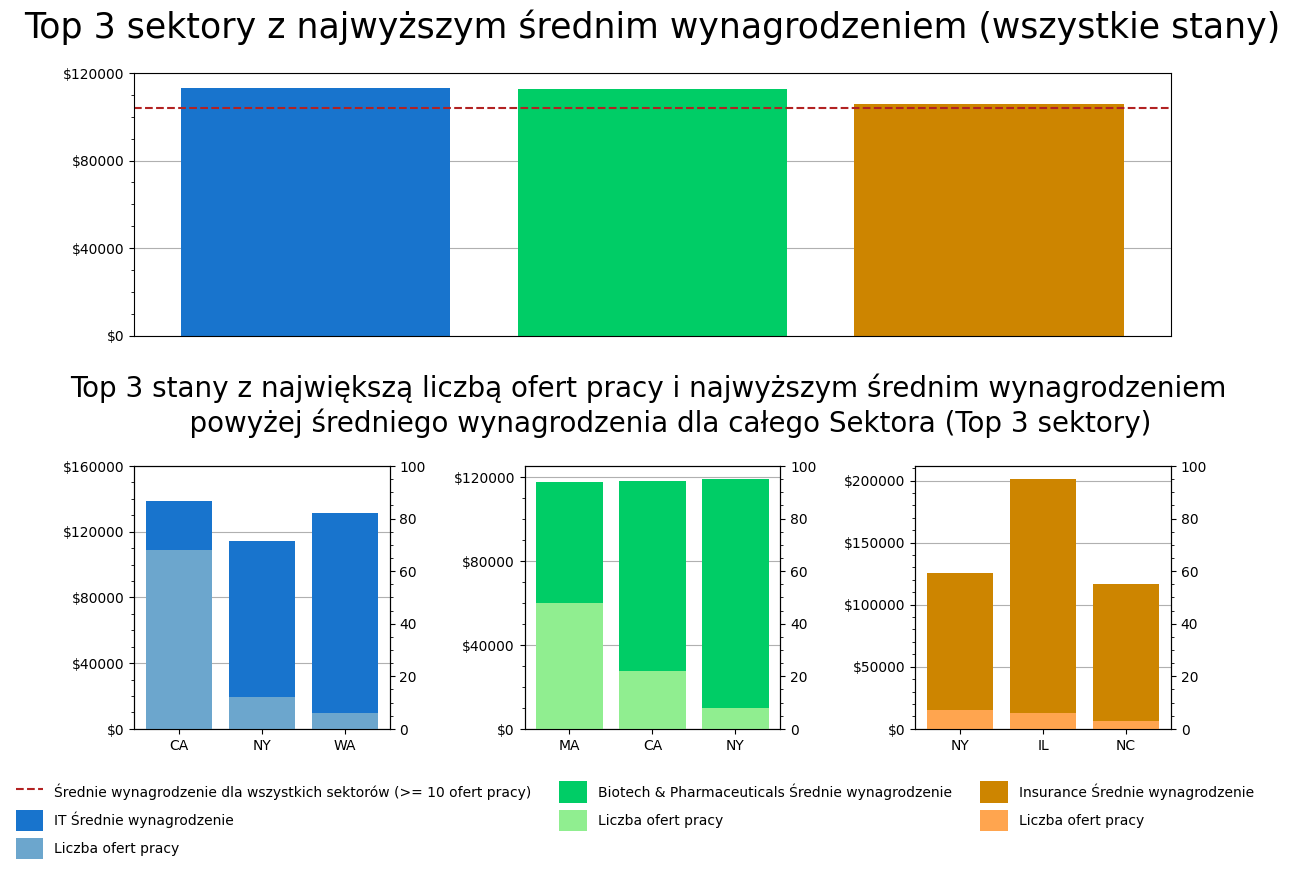

''

In [59]:
##Najpierw tworzę figurę, na której będę pracować
fig = plt.figure(figsize=[12,8])

######IT#######

##Następnie tworzę subplot pokazujący Top 3 sektory i linię z średnią dla wszystkich sektorów
ax_sektory = fig.add_subplot(2,3,(1,3))

ax_sektory.bar(Top_3_10.index, Top_3_10["Średnie_Roczne_Wyn"], color=["#1874CD", '#00CD66','#CD8500'])
ax_sektory.tick_params(axis="x", which="both", bottom=False, labelbottom=False)
ax_sektory.set_title("Top 3 sektory z najwyższym średnim wynagrodzeniem (wszystkie stany)", fontdict={"size" : 25}, y=1.1)

ax_sektory.axhline(śr_waż,color='Firebrick', linestyle="--", label="Średnie wynagrodzenie dla wszystkich sektorów (>= 10 ofert pracy)")


##Następnie tworzę średnie wynagrodzenie w IT dla top 3 stanów
ax_stanwyn_IT = fig.add_subplot(2,3,4)

ax_stanwyn_IT.bar(Top3_stany_IT.index, Top3_stany_IT["Średnie_Roczne_Wyn"], color="#1874CD", 
label="IT Średnie wynagrodzenie")

##A także liczbę ofert dla IT w Top 3 stanach na drugiej osi
ax_stanofer_IT = ax_stanwyn_IT.twinx()
ax_stanofer_IT.bar(Top3_stany_IT.index, Top3_stany_IT["Ilość_ofert"], color='#6CA6CD', label="Liczba ofert pracy")
ax_stanofer_IT.set_ylim(0,100)

######BP#######

##Następnie, średnie wynagrodzenie dla BP dla Top 3 stanów
ax_stanwyn_BP = fig.add_subplot(2,3,5)

ax_stanwyn_BP.bar(Top3_stany_BP.index, Top3_stany_BP["Średnie_Roczne_Wyn"], color="#00CD66", 
label="Biotech & Pharmaceuticals Średnie wynagrodzenie")
ax_stanwyn_BP.set_title(
    """Top 3 stany z największą liczbą ofert pracy i najwyższym średnim wynagrodzeniem 
    powyżej średniego wynagrodzenia dla całego Sektora (Top 3 sektory)""",
    fontdict={"size" : 20}, y=1.1)

##I, liczbę ofert pracy dla BP dla Top 3 stansów
ax_stanofer_BP = ax_stanwyn_BP.twinx()
ax_stanofer_BP.bar(Top3_stany_BP.index, Top3_stany_BP["Ilość_ofert"], color='#90EE90', label="Liczba ofert pracy")
ax_stanofer_BP.set_ylim(0,100)


######Insurance#######

##Następnie, średnie wynagrodzenie dla Insurance dla Top 3 stanów
ax_stanwyn_Ubez = fig.add_subplot(2,3,6)
ax_stanwyn_Ubez.bar(Top3_stany_Ubez.index, Top3_stany_Ubez["Średnie_Roczne_Wyn"], color="#CD8500",
label="Insurance Średnie wynagrodzenie")

##I, liczbę ofert pracy dla Insurance dla Top 3 stansów
ax_stanofer_Ubez = ax_stanwyn_Ubez.twinx()
ax_stanofer_Ubez.bar(Top3_stany_Ubez.index, Top3_stany_Ubez["Ilość_ofert"], color='#FFA54F', 
label="Liczba ofert pracy")
ax_stanofer_Ubez.set_ylim(0,100)



##Kiedy skończę z ogólnym tworzeniem wykresów, czyszczę wykresy i czynię je bardziej atrakcyjnymi wizualnie
##Ponieważ będę stosował ten kod do wszystkich wykresów, stworzyłem pętle, aby to ułatwić.

##Ogólne rzeczy mające zastosowanie do wszystkich wykresów (grids, tick_params, ticklabels itp.)
for g in [ax_sektory, ax_stanwyn_IT, ax_stanwyn_BP, ax_stanwyn_Ubez]:
    g.grid(axis="y", which="major",visible=True)
    g.set_axisbelow(True)
    g.minorticks_on()
    g.tick_params(axis="x", which="minor", bottom=False)

for g in [ax_stanofer_IT, ax_stanofer_BP, ax_stanofer_Ubez]:
    g.minorticks_on()
    g.tick_params(axis="x", which="minor", bottom=False)


for g in [ax_sektory, ax_stanwyn_IT, ax_stanwyn_BP, ax_stanwyn_Ubez]:
    g.set_yticks(g.get_yticks()[0::2])
    g.set_yticklabels(["$" + str("{:.0f}".format(x)) for x in g.get_yticks()])


##Gdy to już jest zrobione, dodaję ostatni akcent (tight_layout, legend)
fig.tight_layout(pad=2)
plt.figlegend(fontsize=10, ncols=3, frameon=False, loc="center", bbox_to_anchor=(0.5, -0.05), handleheight=2)
plt.show()
;


##### Wpływ przychodów na Top 3 stany dla Top 3 sektorów

In [60]:
##Ponieważ zamierzam stworzyć 3 różne wykresy zawierające te same informacje i mające ten sam układ, to
##tworzę funkcję, która będzie miała zastosowanie do wszystkich wykresów

##Ogólne rzeczy mające zastosowanie do wszystkich wykresów (grids, tick_params, ticklabels itp.)
def różne(ax_indeks0, ax_indeks1, ax_indeks2, twinax0, twinax1, twinax2):
    for g in [ax_indeks0, ax_indeks1, ax_indeks2]:
        g.grid(axis="x", which="major",visible=True)
        g.set_axisbelow(True)
        g.minorticks_on()
        g.tick_params(axis="y", which="minor", left=False)

    for g in [twinax0, twinax1, twinax2]:
        g.minorticks_on()
        g.tick_params(axis="y", which="minor", left=False)


    for g in [ax_indeks0, ax_indeks1, ax_indeks2]:
        g.set_xticks(g.get_xticks()[0::2])
        g.set_xticklabels(["$" + str("{:.0f}".format(x)) for x in g.get_xticks()])

##### Information Technology

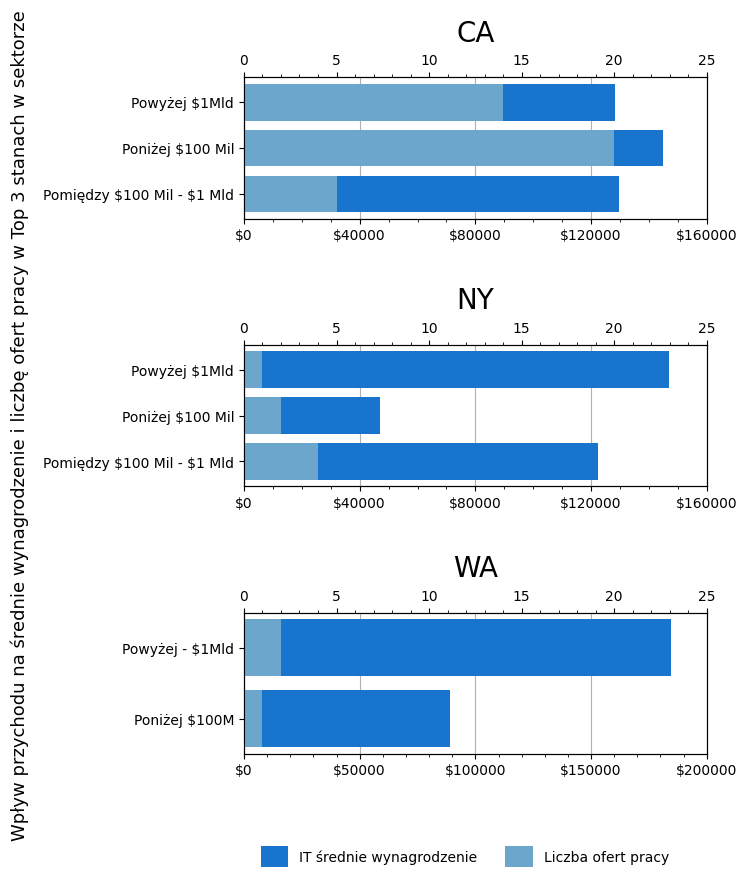

''

In [61]:
##Najpierw tworzę subplot i określam odstępy przy użyciu funkcji tight_layout, gdyż określając  
##je później nie działają one poprawnie na wykresie
fig, ax = plt.subplots(3,1, figsize=(7,9))
fig.tight_layout(pad=7)

##Następnie tworzę poziomy wykres słupkowy, aby pokazać wpływ przychodu w CA
ax[0].barh(prz_ca_it["Przychód"], prz_ca_it["Średnie_Roczne_Wyn"], color="#1874CD", label="IT średnie wynagrodzenie")
ax[0].set_title("CA", fontsize=20, y=1.2)
ax0_oferty = ax[0].twiny()
ax0_oferty.barh(prz_ca_it["Przychód"], prz_ca_it["Ilość_ofert"], color="#6CA6CD", label="Liczba ofert pracy")
ax0_oferty.set_xlim(0,25)

##Następnie tworzę poziomy wykres słupkowy, aby pokazać wpływ przychodu w NY
ax[1].barh(prz_ny_it["Przychód"], prz_ny_it["Średnie_Roczne_Wyn"], color="#1874CD")
ax[1].set_title("NY", fontsize=20, y=1.2)
ax1_oferty = ax[1].twiny()
ax1_oferty.barh(prz_ny_it["Przychód"], prz_ny_it["Ilość_ofert"], color="#6CA6CD")
ax1_oferty.set_xlim(0,25)

##Następnie tworzę poziomy wykres słupkowy, aby pokazać wpływ przychodu w WA
ax[2].barh(prz_wa_it["Przychód"], prz_wa_it["Średnie_Roczne_Wyn"], color="#1874CD")
ax[2].set_title("WA", fontsize=20, y=1.2)
ax2_oferty = ax[2].twiny()
ax2_oferty.barh(prz_wa_it["Przychód"], prz_wa_it["Ilość_ofert"], color="#6CA6CD")
ax2_oferty.set_xlim(0,25)

##Kiedy skończę, dodaję funkcję do czyszczenia wykresów
różne(ax[0],ax[1],ax[2],ax0_oferty,ax1_oferty,ax2_oferty)

#Po zrobieniu tego, czyszczę etykiety osi, ponieważ posiadanie "$" w etykiecie Pomiędzy $100Mil - $1Mld 
##zmienia je na kursywę

ax[0].set_yticks(prz_ca_it["Przychód"])
ax[0].set_yticklabels(['Pomiędzy \$100 Mil - \$1 Mld','Poniżej $100 Mil','Powyżej $1Mld'])

ax[1].set_yticks(prz_ny_it["Przychód"])
ax[1].set_yticklabels(['Pomiędzy \$100 Mil - \$1 Mld','Poniżej $100 Mil','Powyżej $1Mld'])

##Na samym końcu, dodaję tytuł do całej figury i dodaję legendę
fig.supylabel("Wpływ przychodu na średnie wynagrodzenie i liczbę ofert pracy w Top 3 stanach w sektorze", 
fontsize=13,x=-0.15)
plt.figlegend(fontsize=10, ncols=3, frameon=False, loc="center", bbox_to_anchor=(0.5, 0.02), handleheight=2)
plt.show()
;

##### Biotech & Pharmaceuticals

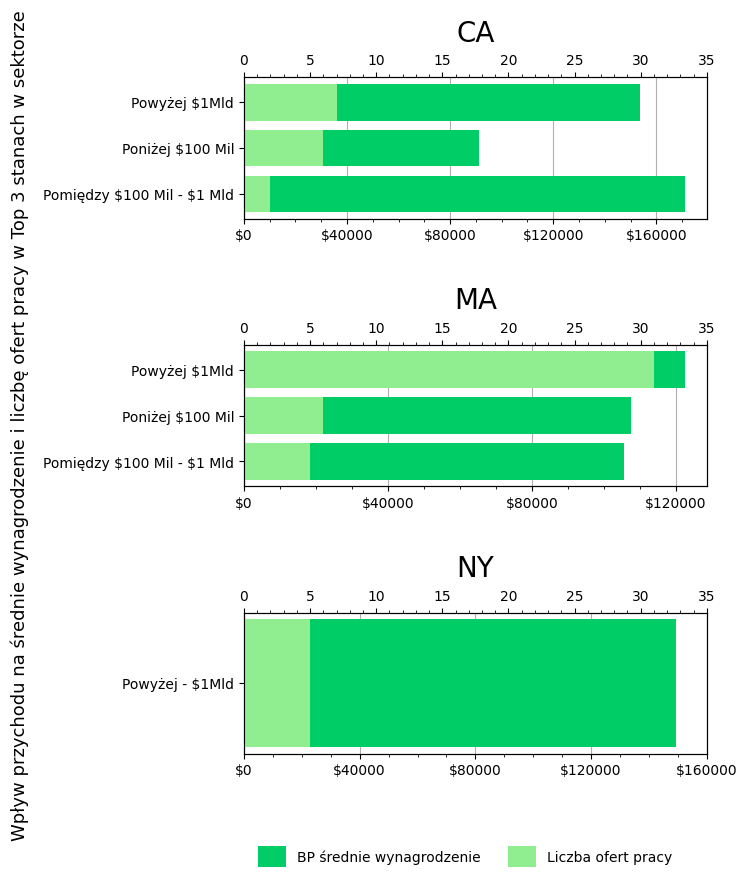

''

In [62]:
##Najpierw tworzę subplot i określam odstępy przy użyciu funkcji tight_layout, gdyż określając  
##je później nie działają one poprawnie na wykresieoes not apply

fig, ax = plt.subplots(3,1, figsize=(7,9))
fig.tight_layout(pad=7)

##Następnie tworzę poziomy wykres słupkowy, aby pokazać wpływ przychodów w CA
ax[0].barh(prz_ca_bp["Przychód"], prz_ca_bp["Średnie_Roczne_Wyn"], color="#00CD66", label="BP średnie wynagrodzenie")
ax[0].set_title("CA", fontsize=20, y=1.2)
ax0_oferty = ax[0].twiny()
ax0_oferty.barh(prz_ca_bp["Przychód"], prz_ca_bp["Ilość_ofert"], color="#90EE90", label="Liczba ofert pracy")
ax0_oferty.set_xlim(0,35)

##Następnie tworzę poziomy wykres słupkowy, aby pokazać wpływ przychodu w MA
ax[1].barh(prz_ma_bp["Przychód"], prz_ma_bp["Średnie_Roczne_Wyn"], color="#00CD66")
ax[1].set_title("MA", fontsize=20, y=1.2)
ax1_oferty = ax[1].twiny()
ax1_oferty.barh(prz_ma_bp["Przychód"], prz_ma_bp["Ilość_ofert"], color="#90EE90")
ax1_oferty.set_xlim(0,35)

##Następnie tworzę poziomy wykres słupkowy, aby pokazać wpływ przychodu w NY
ax[2].barh(prz_ny_bp["Przychód"], prz_ny_bp["Średnie_Roczne_Wyn"], color="#00CD66")
ax[2].set_title("NY", fontsize=20, y=1.2)
ax2_oferty = ax[2].twiny()
ax2_oferty.barh(prz_ny_bp["Przychód"], prz_ny_bp["Ilość_ofert"], color="#90EE90")
ax2_oferty.set_xlim(0,35)

##Kiedy skończę, dodaję funkcję do czyszczenia wykresów
różne(ax[0],ax[1],ax[2],ax0_oferty,ax1_oferty,ax2_oferty)

#Po zrobieniu tego, czyszczę etykiety osi, ponieważ posiadanie "$" w etykiecie Pomiędzy $100Mil - $1Mld 
##zmienia je na kursywę

ax[0].set_yticks(prz_ca_bp["Przychód"])
ax[0].set_yticklabels(['Pomiędzy \$100 Mil - \$1 Mld','Poniżej $100 Mil','Powyżej $1Mld'])

ax[1].set_yticks(prz_ma_bp["Przychód"])
ax[1].set_yticklabels(['Pomiędzy \$100 Mil - \$1 Mld','Poniżej $100 Mil','Powyżej $1Mld'])

##Na samym końcu, dodaję tytuł do całej figury i dodaję legendę
fig.supylabel("Wpływ przychodu na średnie wynagrodzenie i liczbę ofert pracy w Top 3 stanach w sektorze", 
fontsize=13,x=-0.15)
plt.figlegend(fontsize=10, ncols=3, frameon=False, loc="center", bbox_to_anchor=(0.5, 0.02), handleheight=2)
plt.show()
;

##### Insurance

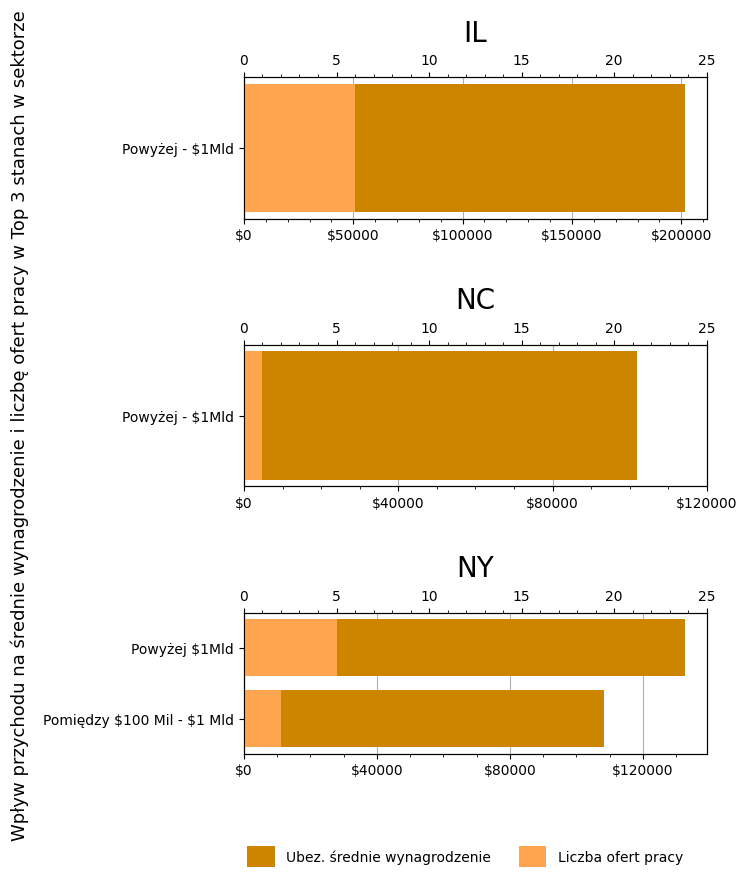

''

In [63]:
##Najpierw tworzę subplot i określam odstępy przy użyciu funkcji tight_layout, gdyż określając  
##je później nie działają one poprawnie na wykresieoes not apply

fig, ax = plt.subplots(3,1, figsize=(7,9))
fig.tight_layout(pad=7)

##Następnie tworzę poziomy wykres słupkowy, aby pokazać wpływ przychodów w IL
ax[0].barh(prz_il_ubez["Przychód"], prz_il_ubez["Średnie_Roczne_Wyn"], color="#CD8500", label="Ubez. średnie wynagrodzenie")
ax[0].set_title("IL", fontsize=20, y=1.2)
ax0_oferty = ax[0].twiny()
ax0_oferty.barh(prz_il_ubez["Przychód"], prz_il_ubez["Ilość_ofert"], color="#FFA54F", label="Liczba ofert pracy")
ax0_oferty.set_xlim(0,25)

##Następnie tworzę poziomy wykres słupkowy, aby pokazać wpływ przychodu w NC
ax[1].barh(prz_nc_ubez["Przychód"], prz_nc_ubez["Średnie_Roczne_Wyn"], color="#CD8500")
ax[1].set_title("NC", fontsize=20, y=1.2)
ax1_oferty = ax[1].twiny()
ax1_oferty.barh(prz_nc_ubez["Przychód"], prz_nc_ubez["Ilość_ofert"], color="#FFA54F")
ax1_oferty.set_xlim(0,25)

##Następnie tworzę poziomy wykres słupkowy, aby pokazać wpływ przychodu w NY
ax[2].barh(prz_ny_ubez["Przychód"], prz_ny_ubez["Średnie_Roczne_Wyn"], color="#CD8500")
ax[2].set_title("NY", fontsize=20, y=1.2)
ax2_oferty = ax[2].twiny()
ax2_oferty.barh(prz_ny_ubez["Przychód"], prz_ny_ubez["Ilość_ofert"], color="#FFA54F")
ax2_oferty.set_xlim(0,25)

##Kiedy skończę, dodaję funkcję do czyszczenia wykresów
różne(ax[0],ax[1],ax[2],ax0_oferty,ax1_oferty,ax2_oferty)

#Po zrobieniu tego, czyszczę etykiety osi, ponieważ posiadanie "$" w etykiecie Pomiędzy $100Mil - $1Mld 
##zmienia je na kursywę
ax[2].set_yticks(prz_ny_ubez["Przychód"])
ax[2].set_yticklabels(['Pomiędzy \$100 Mil - \$1 Mld', 'Powyżej $1Mld'])

##Na samym końcu, dodaję tytuł do całej figury i dodaję legendę
fig.supylabel("Wpływ przychodu na średnie wynagrodzenie i liczbę ofert pracy w Top 3 stanach w sektorze", 
fontsize=13,x=-0.15)
plt.figlegend(fontsize=10, ncols=3, frameon=False, loc="center", bbox_to_anchor=(0.5, 0.02), handleheight=2)
plt.show()
;